### Homework Rakamin Trial Class - Mini Case

# Mengukur Performa Penjualan Ritel Online

## Load Data

In [133]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [134]:
url = 'https://drive.google.com/file/d/1r0qXP_unNdthoUNSrh1z8CfBwWFko_w6/view?usp=sharing'
url2= 'https://drive.google.com/uc?id=' + url.split('/')[-2]

df_dataset = pd.read_csv(url2)
df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


## Section 1

### 1.1 Create New Feature: Year

In [135]:
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


Mengganti InvoiceDate menjadi datetime

In [136]:
df_dataset['InvoiceDate'] = pd.to_datetime(df_dataset['InvoiceDate'])
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


Mendapatkan Tahun

In [137]:
year = pd.DatetimeIndex(df_dataset['InvoiceDate']).year
year

Int64Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
            ...
            2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
           dtype='int64', name='InvoiceDate', length=1067371)

Menambahkan Kolom Year pada Dataset

In [138]:
df_dataset['Year'] = year
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   Year         1067371 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 73.3+ MB


In [139]:
df_dataset['Year'] = year
df_dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


### 1.2 Filtering Data

In [140]:
df_dataset['Quantity'].describe()

count    1.067371e+06
mean     9.938898e+00
std      1.727058e+02
min     -8.099500e+04
25%      1.000000e+00
50%      3.000000e+00
75%      1.000000e+01
max      8.099500e+04
Name: Quantity, dtype: float64

Sales Quantity >= 1

In [141]:
sales = df_dataset[df_dataset['Quantity'] >= 1]
sales

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011


Banyaknya Sales Quantity >= 1

In [142]:
sales.shape[0]

1044421

Invoice yang Tidak Mengandung "C"

In [143]:
sales = sales[~sales['Invoice'].str.contains("C")]
sales.shape[0]

1044420

### 1.3 Create New Feature: Revenue

In [144]:
revenue = sales['Quantity'] * sales['Price']
revenue

0           83.40
1           81.00
2           81.00
3          100.80
4           30.00
            ...  
1067366     12.60
1067367     16.60
1067368     16.60
1067369     14.85
1067370     18.00
Length: 1044420, dtype: float64

Menambahkan Kolom Revenue pada Dataset

In [145]:
sales['Revenue'] = revenue
sales.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044420 entries, 0 to 1067370
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1044420 non-null  object        
 1   StockCode    1044420 non-null  object        
 2   Description  1042727 non-null  object        
 3   Quantity     1044420 non-null  int64         
 4   InvoiceDate  1044420 non-null  datetime64[ns]
 5   Price        1044420 non-null  float64       
 6   Customer ID  805620 non-null   float64       
 7   Country      1044420 non-null  object        
 8   Year         1044420 non-null  int64         
 9   Revenue      1044420 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 87.7+ MB


In [146]:
sales['Revenue'] = revenue
sales

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


### 1.4 Average of Revenue per Year

In [147]:
grafik_visual = sales.groupby('Year')['Revenue'].mean().reset_index()
grafik_visual.rename(columns={'Revenue':'Mean'}, inplace=True)
grafik_visual['Year'] = pd.to_datetime(grafik_visual['Year'], format='%Y')
grafik_visual

,Year,Mean
0,2009-01-01,18.713273
1,2010-01-01,19.908987
2,2011-01-01,20.058767


In [148]:
grafik_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    3 non-null      datetime64[ns]
 1   Mean    3 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 176.0 bytes


Grafik (Visualisasi)

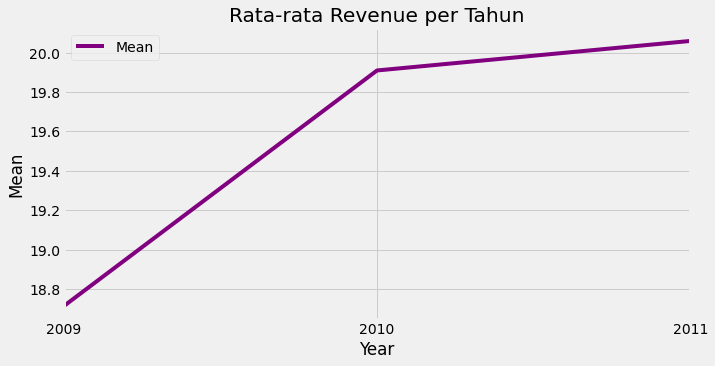

In [149]:
mpl.style.use(['fivethirtyeight'])

grafik_visual.plot(x='Year', y='Mean', kind='line',
                figsize=(10,5), color='purple')
plt.title('Rata-rata Revenue per Tahun')
plt.ylabel('Mean')
plt.xlabel('Year')
plt.show()

### 1.5 Interpretation

Dari data yang ditunjukkan pada 1.4, dapat diinterpretasikan bahwa rata-rata Revenue yang diperoleh pada rentang tahun 2009-2010 meningkat lebih cepat daripada rentang tahun 2010-2011, dilihat dari laju peningkatan yang signifikan. Sedangkan pada rentang tahun 2010-2011 peningkatan revenue cenderung lebih sedikit dengan laju peningkatan yang lebih melandai. Namun setiap tahunnya rata-rara Revenue selalu mengalami peningkatan.







## Section 2

### Filtering Data 

#### 2.1 Customers who finished their purchases

In [150]:
finished = sales[~sales['Customer ID'].isnull()]
finished.shape[0]

805620

In [151]:
finished = sales[~sales['Customer ID'].isnull()]
finished

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009,30.00
...,...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12.60
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,16.60
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011,14.85


#### 2.2 Customers who canceled their purchases

In [152]:
cancel = df_dataset[df_dataset['Invoice'].str.contains("C")]
cancel.shape[0]

19494

In [153]:
cancel = df_dataset[df_dataset['Invoice'].str.contains("C")]
cancel

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia,2009
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia,2009
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia,2009
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia,2009
...,...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,2011
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,2011
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,2011
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,2011


### 2.3 Number of Finished and Canceled Transactions Each Year

In [154]:
finished_vis = finished.groupby('Year')['Invoice'].count().reset_index()
finished_vis.rename(columns={'Invoice' : 'Finished'}, inplace=True)
finished_vis

,Year,Finished
0,2009,30761
1,2010,403094
2,2011,371765


In [155]:
cancel_vis = cancel.groupby('Year')['Invoice'].count().reset_index()
cancel_vis.rename(columns={'Invoice' : 'Cancel'}, inplace=True)
cancel_vis

,Year,Cancel
0,2009,1015
1,2010,9919
2,2011,8560


In [156]:
cancel_temp = cancel_vis['Cancel']
vis = finished_vis
vis['Cancel'] = cancel_temp
vis

,Year,Finished,Cancel
0,2009,30761,1015
1,2010,403094,9919
2,2011,371765,8560


Grafik (Visualisasi)

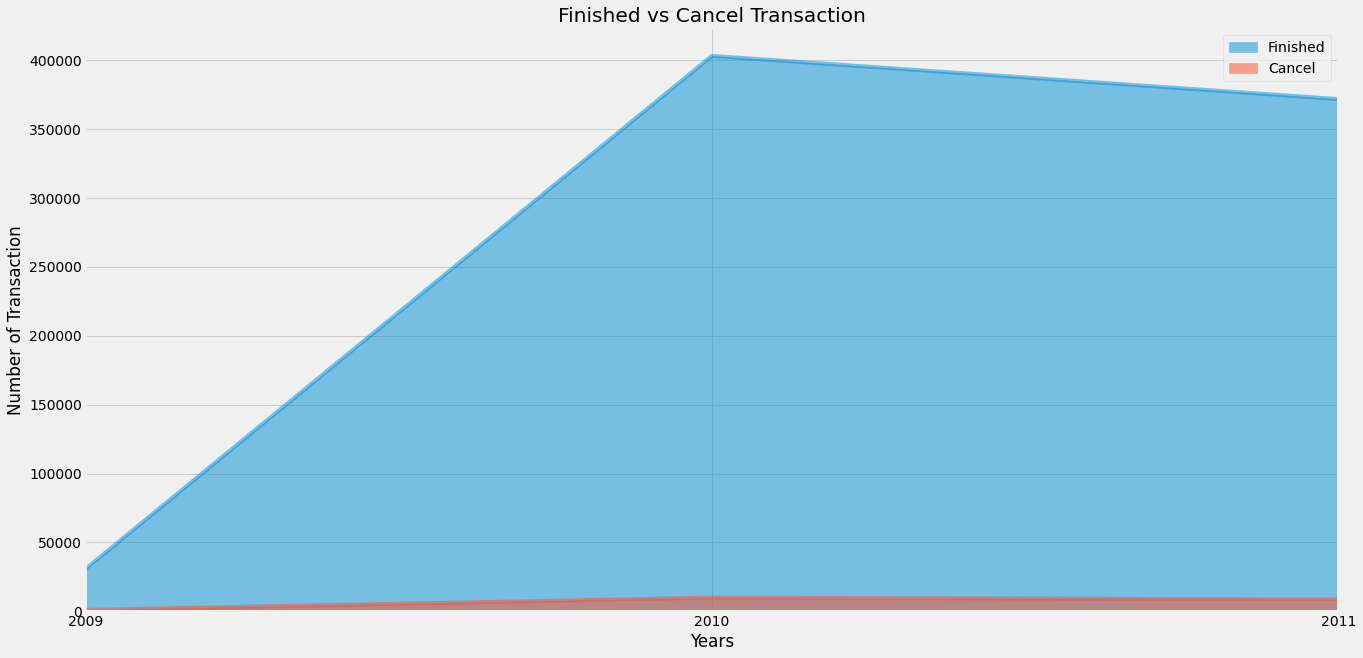

In [157]:
vis['Year'] = pd.to_datetime(vis['Year'], format='%Y')

vis.plot(x='Year',
          kind='area', 
             stacked=False,
             figsize=(20, 10),
         alpha = 0.5
             )

plt.title('Finished vs Cancel Transaction')
plt.ylabel('Number of Transaction')
plt.xlabel('Years')

plt.show()

### 2.4 Cancellation Rate

In [158]:
total = vis['Finished'] + vis['Cancel']
total

0     31776
1    413013
2    380325
dtype: int64

In [159]:
cancel_rate = vis['Cancel'] / total * 100
cancel_rate.values.tolist()
for i in range(len(cancel_rate)):
  print(2009 + i, " mempunyai cancellation rate sebesar ", cancel_rate[i], "%")

2009  mempunyai cancellation rate sebesar  3.194234642497482 %
2010  mempunyai cancellation rate sebesar  2.4016193194887325 %
2011  mempunyai cancellation rate sebesar  2.2507066324853744 %


### 2.5 Interpretation

Dari hasil output nomor 2.3 dan 2.4, dapat diinterpretasikan bahwa banyaknya transaksi yang selesai (finished) dan batal (canceled) mengalami penurunan dari rentang tahun 2010-2011, yang ditandai pula dengan cancellation rate yang selalu turun setiap tahunnya. Hal ini menandakan bahwa performa penjualan ritel online memiliki peningkatan kualitas yang baik meskipun transaksi yang selesai pada tahun 2011 menurun karena diiringi juga dengan penurunan transaksi yang dibatalkan. Tidak hanya itu, cancellation rate yang turun tiap tahunnya memberikan keuntungan yang signifikan pula terhadap penjualan ritel online, karena jumlah customer yang melakukan cancel semakin sedikit.